# 신경망 모델

### 수식적으로는 여러 겹의 행렬/벡터 곱과 활성함수의 합성 함수

### 텐서플로가 제공하는 빌트인 함수를 사용할 수도 있으나 이해하는데 방해 --> 기초적인 연산들로 구현

In [7]:
from matplotlib.patches import Rectangle
def visualize_l2(pred, x_input, y_train):
    plt.plot(x_input, y_train, '.k', markerfacecolor='none')
    plt.plot(x_input, pred,  '--k')
    currentAxis = plt.gca()
    for k, (xx,yy) in enumerate(zip(x_train, y_train)):
        error = pred[k] - yy
        currentAxis.add_patch(Rectangle((xx, yy), 
                                        error, error,
                              alpha=0.1, facecolor='gray', edgecolor='k'))
    plt.grid()
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

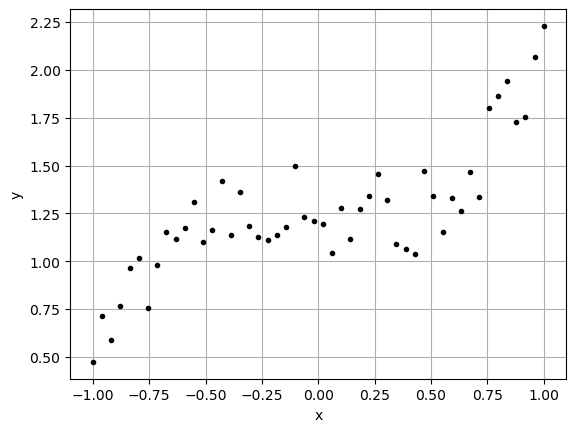

In [9]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
from helper import generate_batches
# 데이터 생성
np.random.seed(327)
x_train = np.linspace(-1,1,50)
y_train = x_train**3 + 0.1 * x_train**2 -0.15 * x_train + 1.0 + 0.5 * np.random.rand(len(x_train))

plt.plot(x_train, y_train, '.k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [21]:
features1 = np.array([[xval] for xval in x_train])
features2 = np.array([[xval**2, xval] for xval in x_train])
features3 = np.array([[xval**3, xval**2, xval] for xval in x_train])
features4 = np.array([[np.cos(np.pi * xval), np.sin(np.pi * xval)] for xval in x_train])
labels = y_train.reshape(-1, 1)

In [23]:
features = np.array([[xval] for xval in x_train])

In [25]:
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        num_hidden1 = 10 # 은닉층1의 노드 개수
        num_hidden2 = 10 # 은닉층2의 노드 개수

        # 은닉층 1 의 Weight 와 Bias
        self.W1 = tf.Variable(tf.random.normal([1, num_hidden1], seed=624)) 
        self.b1 = tf.Variable(tf.random.normal([num_hidden1], seed=624)) 

        # 은닉층 2 의 Weight 와 Bias
        self.W2 = tf.Variable(tf.random.normal([num_hidden1, num_hidden2], seed=624)) 
        self.b2 = tf.Variable(tf.random.normal([num_hidden2], seed=624)) 

        # 출력층의 Weight 와 Bias
        self.W3 = tf.Variable(tf.random.normal([num_hidden2, 1], seed=624)) 
        self.b3 = tf.Variable(tf.random.normal([1], seed=624)) 

    def call(self, x):
        l1 = tf.matmul(x, self.W1) + self.b1 # 은닉층 1 의 로짓 계산
        h1 = tf.nn.sigmoid(l1) # 은닉층 1 의 활성함수 계산

        l2 = tf.matmul(h1, self.W2) + self.b2 # 은닉층 2 의 로짓 계산
        h2 = tf.nn.sigmoid(l2) # 은닉층 2 의 활성함수 계산

        yhat = tf.matmul(h2, self.W3) + self.b3 # 출력층에서 모델의 예측값 계산
        return yhat

In [27]:
model = MyModel()

In [29]:
MaxEpochs = 120
batch_size = 10
lr = 0.1
optimizer = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.MeanSquaredError()

In [31]:
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

model.compile(optimizer = optimizer, loss = loss)
model.fit(shuffled_x_train, shuffled_y_train, 
          epochs = MaxEpochs, batch_size = batch_size, 
          shuffle = False, verbose=0)

2/2 [==============================] - 0s 5ms/step - loss: 0.0174


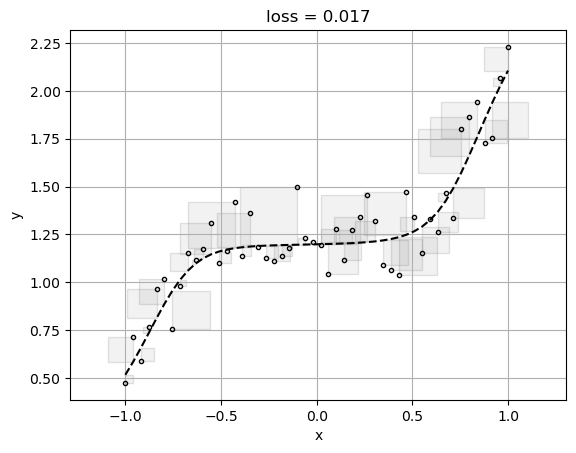

In [33]:
prediction_values = model.predict(features)
final_loss = model.evaluate(features,labels)
plt.title("loss = {:1.3f}".format(final_loss))
visualize_l2(prediction_values.reshape(-1), x_train, labels.reshape(-1))
plt.show()

## 신경망 모델의 다양한 표현

In [38]:
num_hidden1 = 10
num_hidden2 = 10
W1 = tf.constant_initializer(tf.Variable(tf.random.normal([1, num_hidden1], seed=624)).numpy())
b1 = tf.constant_initializer(tf.Variable(tf.random.normal([num_hidden1], seed=624)).numpy())

W2 = tf.constant_initializer(tf.Variable(tf.random.normal([num_hidden1, num_hidden2], seed=624)).numpy())
b2 = tf.constant_initializer(tf.Variable(tf.random.normal([num_hidden2], seed=624)).numpy())

W3 = tf.constant_initializer(tf.Variable(tf.random.normal([num_hidden2, 1], seed=624)).numpy())
b3 = tf.constant_initializer(tf.Variable(tf.random.normal([1], seed=624)).numpy())

class MyModel(tf.keras.Model):
  def __init__(self, **kwargs):
      super().__init__(**kwargs)

      self.hidden1 = tf.keras.layers.Dense(10, activation=tf.nn.sigmoid,  # 간단하게 레이어 구현!
        kernel_initializer=W1, bias_initializer=b1, name='hidden_1')

      self.hidden2 = tf.keras.layers.Dense(10, activation=tf.nn.sigmoid, # 간단하고 높은 가독성의 코드를 만들 수 있다
        kernel_initializer=W2, bias_initializer=b2, name='hidden_2')

      self.out = tf.keras.layers.Dense(1, activation = None,
        kernel_initializer=W3, bias_initializer=b3, name='output')

  def call(self, x):
      h1 = self.hidden1(x)
      h2 = self.hidden2(h1)
      yhat = self.out(h2)
      return yhat

2/2 [==============================] - 0s 18ms/step - loss: 0.0176


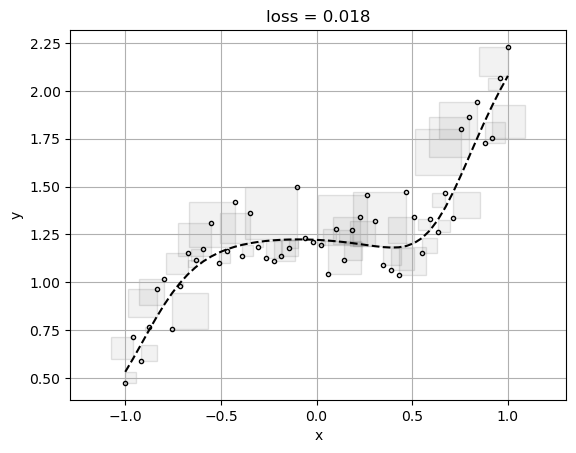

In [40]:
model = MyModel()

MaxEpochs = 120
batch_size = 10
lr = 0.1
optimizer = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.MeanSquaredError()

np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

model.compile(optimizer = optimizer, loss = loss)
model.fit(shuffled_x_train, shuffled_y_train, 
          epochs = MaxEpochs, batch_size = batch_size, 
          shuffle = False, verbose=0)

prediction_values = model.predict(features)
final_loss = model.evaluate(features,labels)
plt.title("loss = {:1.3f}".format(final_loss))
visualize_l2(prediction_values.reshape(-1), x_train, labels.reshape(-1))
plt.show()

In [42]:
for var in model.layers:  # 현재 선언된 모든 variable 파악 가능
  var_name = var.trainable_variables[0].name
  var_shape = var.trainable_variables[0].shape
  print(var_name, var_shape, np.prod(var_shape))

  var_name = var.trainable_variables[1].name
  var_shape = var.trainable_variables[1].shape
  print(var_name, var_shape, np.prod(var_shape))

my_model_2/hidden_1/kernel:0 (1, 10) 10
my_model_2/hidden_1/bias:0 (10,) 10
my_model_2/hidden_2/kernel:0 (10, 10) 100
my_model_2/hidden_2/bias:0 (10,) 10
my_model_2/output/kernel:0 (10, 1) 10
my_model_2/output/bias:0 (1,) 1


## "Garbage in, garbage out"

# 신경망 모델의 단점

### 선형 모델에 비해 최적화 차원 높음(특성값 쉽게 파악할 수 있는 경우에는 굳이 신경망을 통한 많은 계산 필요 x)

### 학습할때 초깃값에 매우 민감

In [53]:
initializer = tf.keras.initializers.Zeros() # 0으로 싹다 초기화

class MyModel(tf.keras.Model):
  def __init__(self, **kwargs):
      super().__init__(**kwargs)
      # 은닉층 1
      self.hidden1 = tf.keras.layers.Dense(10, activation=tf.nn.sigmoid,
        kernel_initializer=initializer, bias_initializer=initializer, name='hidden_1')
      # 은닉층 2
      self.hidden2 = tf.keras.layers.Dense(10, activation=tf.nn.sigmoid,
        kernel_initializer=initializer, bias_initializer=initializer, name='hidden_2')
      # 출력
      self.out = tf.keras.layers.Dense(1, activation = None,
        kernel_initializer=initializer, bias_initializer=initializer, name='output')

  def call(self, x):
      h1 = self.hidden1(x) # 은닉층 1
      h2 = self.hidden2(h1) # 은닉층 2
      yhat = self.out(h2) # 출력층
      return yhat

2/2 [==============================] - 0s 4ms/step - loss: 0.0404


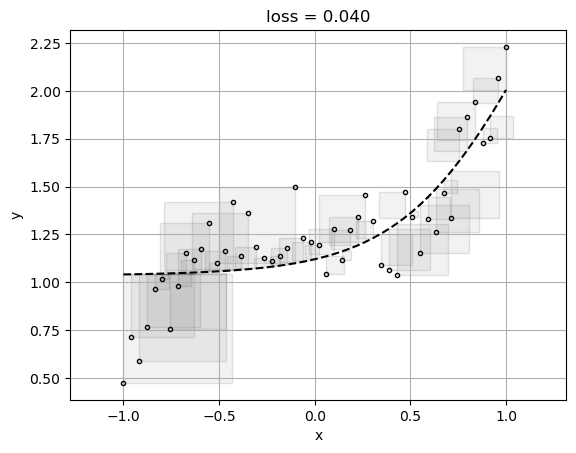

In [55]:
model = MyModel()

MaxEpochs = 120
batch_size = 10
lr = 0.1
optimizer = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.MeanSquaredError()

np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

model.compile(optimizer = optimizer, loss = loss)
model.fit(shuffled_x_train, shuffled_y_train, 
          epochs = MaxEpochs, batch_size = batch_size, 
          shuffle = False, verbose=0)

prediction_values = model.predict(features)
final_loss = model.evaluate(features,labels)
plt.title("loss = {:1.3f}".format(final_loss))
visualize_l2(prediction_values.reshape(-1), x_train, labels.reshape(-1))
plt.show()

In [61]:
initializer = tf.keras.initializers.Ones() # 싹다 1로 초기화

class MyModel(tf.keras.Model):
  def __init__(self, **kwargs):
      super().__init__(**kwargs)
      # 은닉층 1
      self.hidden1 = tf.keras.layers.Dense(10, activation=tf.nn.sigmoid,
        kernel_initializer=initializer, bias_initializer=initializer, name='hidden_1')
      # 은닉층 2
      self.hidden2 = tf.keras.layers.Dense(10, activation=tf.nn.sigmoid,
        kernel_initializer=initializer, bias_initializer=initializer, name='hidden_2')
      # 출력
      self.out = tf.keras.layers.Dense(1, activation = None,
        kernel_initializer=initializer, bias_initializer=initializer, name='output')

  def call(self, x):
      h1 = self.hidden1(x) # 은닉층 1
      h2 = self.hidden2(h1) # 은닉층 2
      yhat = self.out(h2) # 출력층
      return yhat

2/2 [==============================] - 0s 5ms/step - loss: 0.0650


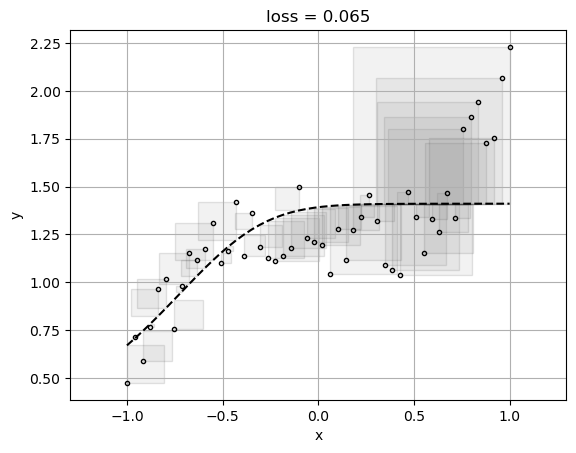

In [63]:
model = MyModel()

MaxEpochs = 120
batch_size = 10
lr = 0.1
optimizer = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.MeanSquaredError()

np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

model.compile(optimizer = optimizer, loss = loss)
model.fit(shuffled_x_train, shuffled_y_train, 
          epochs = MaxEpochs, batch_size = batch_size, 
          shuffle = False, verbose=0)

prediction_values = model.predict(features)
final_loss = model.evaluate(features,labels)
plt.title("loss = {:1.3f}".format(final_loss))
visualize_l2(prediction_values.reshape(-1), x_train, labels.reshape(-1))
plt.show()

### 과적합(overfitting) --> 잠재 성능이 너무 크기 때문에 사용자의 기대보다 훨씬 데이터를 잘 표현하는 모델 얻게됨

## 밑 코드 과적합인지 확인 필요

In [66]:
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1., seed=119)

class MyModel(tf.keras.Model):
  def __init__(self, **kwargs):
      super().__init__(**kwargs)

      self.hidden1 = tf.keras.layers.Dense(10, activation=tf.nn.sigmoid,
        kernel_initializer=initializer, bias_initializer=initializer, name='hidden_1')

      self.hidden2 = tf.keras.layers.Dense(10, activation=tf.nn.sigmoid,
        kernel_initializer=initializer, bias_initializer=initializer, name='hidden_2')

      self.out = tf.keras.layers.Dense(1, activation = None,
        kernel_initializer=initializer, bias_initializer=initializer, name='output')

  def call(self, x):
      h1 = self.hidden1(x)
      h2 = self.hidden2(h1)
      yhat = self.out(h2)
      return yhat

2/2 [==============================] - 0s 3ms/step - loss: 0.0182


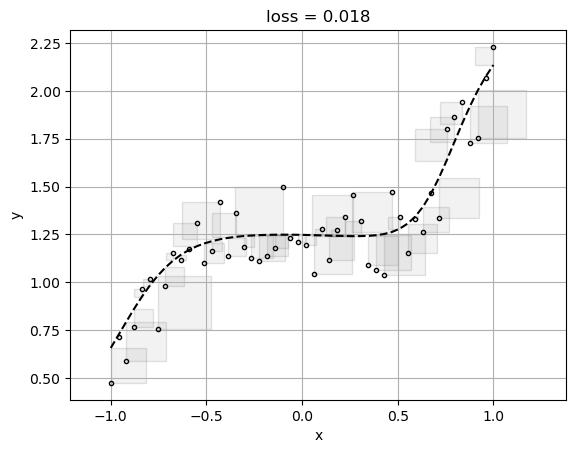

In [68]:
model = MyModel()

MaxEpochs = 120
batch_size = 10
lr = 0.1
optimizer = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.MeanSquaredError()

np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

model.compile(optimizer = optimizer, loss = loss)
model.fit(shuffled_x_train, shuffled_y_train, 
          epochs = MaxEpochs, batch_size = batch_size, 
          shuffle = False, verbose=0)

prediction_values = model.predict(features)
final_loss = model.evaluate(features,labels)
plt.title("loss = {:1.3f}".format(final_loss))
visualize_l2(prediction_values.reshape(-1), x_train, labels.reshape(-1))
plt.show()